In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/Celerates/Notebook/Final Project/datasets/acceptance_dataset.csv')
print(df.shape)
df.head(5)

(10174, 5)


,Role,Resume,Decision,Reason_for_decision,Job_Description
0,E-commerce Specialist,Here's a professional resume for Jason Jones:\...,reject,Lacked leadership skills for a senior position.,Be part of a passionate team at the forefront ...
1,Game Developer,Here's a professional resume for Ann Marshall:...,select,Strong technical skills in AI and ML.,Help us build the next-generation products as ...
2,Human Resources Specialist,Here's a professional resume for Patrick Mccla...,reject,Insufficient system design expertise for senio...,We need a Human Resources Specialist to enhanc...
3,E-commerce Specialist,Here's a professional resume for Patricia Gray...,select,Impressive leadership and communication abilit...,Be part of a passionate team at the forefront ...
4,E-commerce Specialist,Here's a professional resume for Amanda Gross:...,reject,Lacked leadership skills for a senior position.,We are looking for an experienced E-commerce S...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10174 entries, 0 to 10173
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Role                 10174 non-null  object
 1   Resume               10174 non-null  object
 2   Decision             10174 non-null  object
 3   Reason_for_decision  10174 non-null  object
 4   Job_Description      10174 non-null  object
dtypes: object(5)
memory usage: 397.6+ KB


In [4]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 Role                   0
Resume                 0
Decision               0
Reason_for_decision    0
Job_Description        0
dtype: int64


# preprocessing

### Text Cleaning

In [5]:
import re
import string
from bs4 import BeautifulSoup

corpus = df["Resume"].astype(str).tolist()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\W', ' ', text)
    text = BeautifulSoup(text, "html.parser").get_text()
    text = re.sub(r'\s+', ' ', text).strip()
    return text
cleaned_corpus = [clean_text(doc) for doc in corpus]

In [6]:
df["cleaned_text"] = cleaned_corpus
print(df["cleaned_text"].head())

0    heres a professional resume for jason jones ja...
1    heres a professional resume for ann marshall a...
2    heres a professional resume for patrick mcclai...
3    heres a professional resume for patricia gray ...
4    heres a professional resume for amanda gross a...
Name: cleaned_text, dtype: object


### Tokenization

In [ ]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt_tab')

tokenized_corpus = [word_tokenize(doc) for doc in cleaned_corpus]
print(tokenized_corpus)

### Stop Words Removal

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
filtered_corpus = [[word for word in doc if word not in stop_words] for doc in tokenized_corpus]
print(filtered_corpus)

### Stemming and Lemmatization

In [ ]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('wordnet')

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

stemmed_corpus = [[stemmer.stem(word) for word in doc] for doc in filtered_corpus]
lemmatized_corpus = [[lemmatizer.lemmatize(word) for word in doc] for doc in filtered_corpus]
print(stemmed_corpus)
print(lemmatized_corpus)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Buffered data was truncated after reaching the output size limit.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
lemmatized_texts = [" ".join(tokens) for tokens in lemmatized_corpus]

tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X = tfidf.fit_transform(lemmatized_texts)

print("TF-IDF shape:", X.shape)

TF-IDF shape: (10174, 5000)


### jumlah kategore (role)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df["Role"])

print("Jumlah kategori:", len(le.classes_))

Jumlah kategori: 45


## TRAIN SPLIT

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (8139, 5000)
Test size: (2035, 5000)


In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split

smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=2)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Tampilkan distribusi setelah resampling (opsional)
print("Distribusi Kelas Awal (sebelum SMOTE):", Counter(y))
print("Distribusi Kelas Setelah SMOTE:", Counter(y_resampled))

# Split data hasil SMOTE
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

print(f"\nTrain size setelah SMOTE: {X_train_smote.shape}")
print(f"Test size setelah SMOTE: {X_test_smote.shape}")

Distribusi Kelas Awal (sebelum SMOTE): Counter({np.int64(13): 538, np.int64(32): 480, np.int64(27): 458, np.int64(12): 447, np.int64(35): 375, np.int64(10): 329, np.int64(42): 307, np.int64(39): 307, np.int64(41): 303, np.int64(40): 287, np.int64(17): 268, np.int64(15): 266, np.int64(24): 265, np.int64(22): 262, np.int64(16): 260, np.int64(30): 257, np.int64(5): 254, np.int64(29): 251, np.int64(3): 251, np.int64(25): 247, np.int64(18): 246, np.int64(14): 243, np.int64(6): 240, np.int64(19): 239, np.int64(7): 238, np.int64(2): 237, np.int64(8): 234, np.int64(37): 227, np.int64(4): 226, np.int64(1): 225, np.int64(11): 225, np.int64(23): 224, np.int64(33): 223, np.int64(38): 183, np.int64(43): 155, np.int64(44): 132, np.int64(34): 71, np.int64(31): 66, np.int64(28): 56, np.int64(26): 16, np.int64(20): 15, np.int64(0): 13, np.int64(21): 12, np.int64(9): 9, np.int64(36): 7})
Distribusi Kelas Setelah SMOTE: Counter({np.int64(17): 538, np.int64(19): 538, np.int64(22): 538, np.int64(25): 538, 

## Build and Train Model (Logistic Regression)

In [ ]:
from sklearn.linear_model import LogisticRegression

# 3. Bangun dan Latih Model Logistic Regression menggunakan data SMOTE
logreg_smote = LogisticRegression(max_iter=2000, random_state=42)
logreg_smote.fit(X_train_smote, y_train_smote)

# Membuat prediksi pada set pengujian SMOTE
y_pred_smote = logreg_smote.predict(X_test_smote)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluasi menggunakan y_test_smote (data test setelah SMOTE)
acc_smote = accuracy_score(y_test_smote, y_pred_smote)
print(f"Accuracy Model dengan SMOTE: {acc_smote:.4f}")

print("\nClassification Report dengan SMOTE:")
# Evaluasi menggunakan y_test_smote (data test setelah SMOTE)
print(classification_report(y_test_smote, y_pred_smote))

Accuracy Model dengan SMOTE: 0.9934

Classification Report dengan SMOTE:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       109
           2       1.00      1.00      1.00       107
           3       1.00      1.00      1.00       109
           4       1.00      1.00      1.00       102
           5       1.00      1.00      1.00       103
           6       1.00      1.00      1.00       120
           7       1.00      1.00      1.00       110
           8       1.00      1.00      1.00        96
           9       1.00      1.00      1.00       110
          10       0.98      0.99      0.99       106
          11       1.00      1.00      1.00       102
          12       0.95      0.98      0.97       107
          13       0.95      0.99      0.97       100
          14       1.00      1.00      1.00        89
          15       1.00      1.00      1.00       104
        

In [ ]:
import joblib

# Save the TF-IDF vectorizer
joblib.dump(tfidf, "acceptance_tfidf_vectorizer.joblib")
print("TF-IDF vectorizer saved as acceptance_tfidf_vectorizer.joblib")

TF-IDF vectorizer saved as acceptance_tfidf_vectorizer.joblib


In [ ]:
# Save the LabelEncoder
joblib.dump(le, "acceptance_label_encoder.joblib")
print("Label encoder saved as acceptance_label_encoder.joblib")

Label encoder saved as acceptance_label_encoder.joblib


In [ ]:
# Save the trained Naive Bayes model (already done, but re-confirming)
joblib.dump(logreg_smote, "acceptance_classification_model.joblib")
print("Naive Bayes model saved as acceptance_classification_model.joblib")

Naive Bayes model saved as acceptance_classification_model.joblib


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk

# Download stopwords if not already downloaded
try:
    nltk.data.find('corpora/stopwords')
except nltk.downloader.DownloadError:
    nltk.download('stopwords')

# Get a list of English stopwords
stop_words = set(stopwords.words('english'))

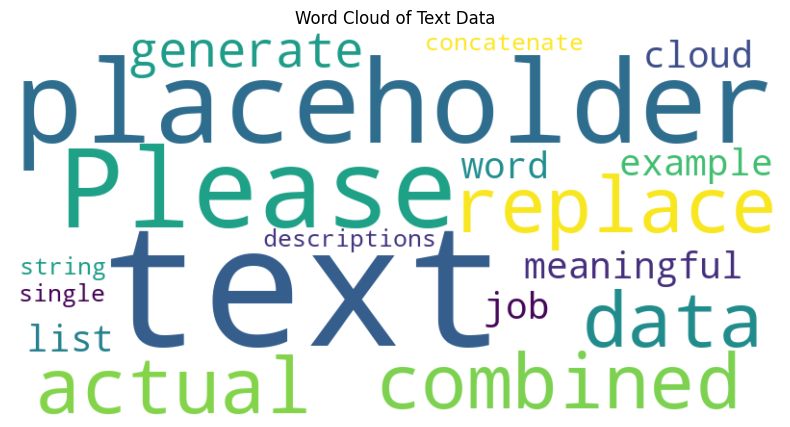

In [ ]:
# Example: Assuming 'df' is your original DataFrame and 'text_column' contains the text
# If you don't have this, replace `all_text` with your consolidated text string.
# all_text = ' '.join(df['text_column'].astype(str).tolist()) # Uncomment and modify if df exists

# Placeholder for all text if df is not available or column name is different
# Replace this with your actual combined text data
all_text = "This is a placeholder text. Please replace it with your actual combined text data to generate a meaningful word cloud. For example, if you have a list of job descriptions, you'd concatenate them into a single string here." # Example placeholder

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(all_text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Text Data')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
fig, ax = plt.subplots(figsize=(15, 15))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

NameError: name 'y_pred' is not defined

In [ ]:
for i in range(cm.shape[0]):
  print(f"[{', '.join([f'{num:,}' for num in cm[i]])}],")